In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', size=35) 

In [2]:
df = pd.read_excel('data/nov_2020_rejects.xlsx')

In [3]:
df.loc[df['JURISDICTION'] == 'CLINTON TOWNSHIP']

Unnamed: 0  DLCOUNTYCODE  JURISDCODE          COUNTY      JURISDICTION  \
769        770.0          46.0     16500.0  LENAWEE COUNTY  CLINTON TOWNSHIP   
830        831.0          50.0     16520.0   MACOMB COUNTY  CLINTON TOWNSHIP   
1185      1186.0          68.0     16540.0   OSCODA COUNTY  CLINTON TOWNSHIP   

      BALLOTS ISSUED  BALLOTS TABULATED  NO SIGNATURE  SIGNATURE NO MATCH  \
769             1297               1217           0.0                 0.0   
830            37350              34575          24.0                13.0   
1185             134                110           0.0                 0.0   

      BALLOT LATE  VOTER SENTENCED  VOTER MOVED  VOTER CANCELLED  \
769           2.0              0.0          3.0              0.0   
830          42.0              0.0        149.0              1.0   
1185          0.0              0.0          0.0              1.0   

      VOTER REJECTED  VOTER DECEASED  VOTED AT POLLS  NO BALLOT IN ENVELOPE  \
769              0.0             5.0             0.0                    0.0   
830              0.0            48.0             0.0                    1.0   
1185             0.0             0.0             0.0                    0.0   

      ID NOT CONFIRMED  TOTAL BALLOTS REJECTED  
769                0.0                      10  
830                0.0                     278  
1185               0.0                       1

In [24]:
#Calculate % of total ballots rejected over total ballots tabulated statewide 
df['rejection rate'] = df['TOTAL BALLOTS REJECTED']/df['BALLOTS TABULATED']

In [26]:
rejected_rate = df['rejection rate'].mean()

In [27]:
rejected_rate

0.008891943378693833

In [48]:
#Make bar chart that compares statewide avoidable ballot rejection rate; EP focus jurisdiction rate; and 
#Detroit rate 
df['AVOIDABLE BALLOTS REJ'] = df['NO SIGNATURE'] + df ['SIGNATURE NO MATCH'] + df['BALLOT LATE'] + df['NO BALLOT IN ENVELOPE'] + df['ID NOT CONFIRMED']


In [49]:
df['AVOIDABLE RATE'] = df['AVOIDABLE BALLOTS REJ']/df['TOTAL BALLOTS REJECTED']

In [50]:
df.head()

Unnamed: 0  DLCOUNTYCODE  JURISDCODE         COUNTY        JURISDICTION  \
0         1.0           1.0      1040.0  ALCONA COUNTY     ALCONA TOWNSHIP   
1         2.0           1.0     12460.0  ALCONA COUNTY  CALEDONIA TOWNSHIP   
2         3.0           1.0     19320.0  ALCONA COUNTY     CURTIS TOWNSHIP   
3         4.0           1.0     34820.0  ALCONA COUNTY  GREENBUSH TOWNSHIP   
4         5.0           1.0     35740.0  ALCONA COUNTY     GUSTIN TOWNSHIP   

   BALLOTS ISSUED  BALLOTS TABULATED  NO SIGNATURE  SIGNATURE NO MATCH  \
0             460                427           0.0                 3.0   
1             369                330           0.0                 0.0   
2             389                338           0.0                 0.0   
3             437                395           0.0                 0.0   
4             178                167           0.0                 0.0   

   BALLOT LATE  ...  VOTER CANCELLED  VOTER REJECTED  VOTER DECEASED  \
0          0.0  ...              0.0             0.0             0.0   
1          0.0  ...              0.0             0.0             0.0   
2          0.0  ...              0.0             0.0             1.0   
3          0.0  ...              0.0             0.0             2.0   
4          1.0  ...              0.0             0.0             0.0   

   VOTED AT POLLS  NO BALLOT IN ENVELOPE  ID NOT CONFIRMED  \
0             0.0                    0.0               0.0   
1             0.0                    0.0               0.0   
2             0.0                    0.0               0.0   
3             0.0                    0.0               0.0   
4             0.0                    0.0               0.0   

   TOTAL BALLOTS REJECTED  rejection rate  AVOIDABLE BALLOTS REJ  \
0                       3        0.007026                    3.0   
1                       1        0.003030                    0.0   
2                       1        0.002959                    0.0   
3                       4        0.010127                    0.0   
4                       2        0.011976                    1.0   

   AVOIDABLE RATE  
0             1.0  
1             0.0  
2             0.0  
3             0.0  
4             0.5  

[5 rows x 22 columns]

In [51]:
df['AVOIDABLE BALLOTS REJ'].sum()

6958.0

In [52]:
df['TOTAL BALLOTS REJECTED'].sum()

97972

In [53]:
6958/97972

0.07102029151186053

In [54]:
#df.groupby(['AVOIDABLE BALLOTS REJ', 'TOTAL BALLOTS REJECTED']).mean().unstack().plot(kind='bar', stacked=True)

In [55]:
sw_avoidable_rate = df['AVOIDABLE RATE'].mean()

In [56]:
sw_avoidable_rate

0.15382586506693674

In [4]:
dupes_sw = df[df['JURISDCODE'].duplicated(keep=False)]
dupes_sw

Empty DataFrame
Columns: [Unnamed: 0, DLCOUNTYCODE, JURISDCODE, COUNTY, JURISDICTION, BALLOTS ISSUED, BALLOTS TABULATED, NO SIGNATURE, SIGNATURE NO MATCH, BALLOT LATE, VOTER SENTENCED, VOTER MOVED, VOTER CANCELLED, VOTER REJECTED, VOTER DECEASED, VOTED AT POLLS, NO BALLOT IN ENVELOPE, ID NOT CONFIRMED, TOTAL BALLOTS REJECTED]
Index: []

In [5]:
df.shape

(1521, 19)

In [6]:
list(df.columns)

['Unnamed: 0',
 'DLCOUNTYCODE',
 'JURISDCODE',
 'COUNTY',
 'JURISDICTION',
 'BALLOTS ISSUED',
 'BALLOTS TABULATED',
 'NO SIGNATURE',
 'SIGNATURE NO MATCH',
 'BALLOT LATE',
 'VOTER SENTENCED',
 'VOTER MOVED',
 'VOTER CANCELLED',
 'VOTER REJECTED',
 'VOTER DECEASED',
 'VOTED AT POLLS',
 'NO BALLOT IN ENVELOPE',
 'ID NOT CONFIRMED',
 'TOTAL BALLOTS REJECTED']

In [7]:
jurisdictions = pd.read_excel('data/focus jurisdictions.xlsx')

In [8]:
list(jurisdictions.columns)

['jurisdiction ']

In [9]:
jurisdictions.shape

(54, 1)

In [10]:
jurisdictions.isna().sum()

jurisdiction     0
dtype: int64

In [11]:
new_juris = jurisdictions['jurisdiction '].str.split("(", n=1, expand=True)

In [12]:
new_juris = new_juris.rename({0: "jurisdiction"}, axis='columns')

In [13]:
focus_jurisdictions = new_juris[['jurisdiction']]

In [14]:
#Make a series with focus jurisdictions in all caps 
focus_jurisdictions = focus_jurisdictions['jurisdiction'].str.upper().str.rstrip()

In [15]:
focus_jurisdictions = focus_jurisdictions.to_list()

In [16]:
focus_jurisdictions

['ALBION CITY',
 'ALLENDALE TOWNSHIP',
 'ANN ARBOR CITY',
 'BATTLE CREEK CITY',
 'BAY CITY CITY',
 'BENTON CHARTER TOWNSHIP',
 'BENTON HARBOR CITY',
 'BUENA VISTA CHARTER TOWNSHIP',
 'CANTON TOWNSHIP',
 'CENTER LINE CITY',
 'CLINTON TOWNSHIP',
 'CLYDE TOWNSHIP',
 'COVERT TOWNSHIP',
 'DEARBORN CITY',
 'DEARBORN HEIGHTS CITY',
 'DETROIT CITY',
 'EASTPOINTE CITY',
 'EAST LANSING CITY',
 'ECORSE CITY',
 'FENNVILLE',
 'FLINT CITY',
 'FLINT TOWNSHIP',
 'GRAND RAPIDS CITY',
 'HAMTRAMCK CITY',
 'HARPER WOODS CITY',
 'HARRIS TOWNSHIP',
 'HIGHLAND PARK CITY',
 'HOLLAND CITY',
 'HOLLAND TOWNSHIP',
 'INKSTER',
 'KALAMAZOO CITY',
 'KENTWOOD CITY',
 'LANSING CITY',
 'LIVONIA',
 'MARQUETTE CITY',
 'MOUNT PLEASANT CITY',
 'MUSKEGON CITY',
 'MUSKEGON HEIGHTS CITY',
 'NOVI CITY',
 'OAK PARK CITY',
 'PONTIAC CITY',
 'PORT HURON CITY',
 'REDFORD TOWNSHIP',
 'RIVER ROUGE CITY',
 'ROYAL OAK TOWNSHIP',
 'SAGINAW CITY',
 'ST. CLAIR SHORES CITY',
 'STERLING HEIGHTS CITY',
 'SOUTHFIELD CITY',
 'TROY CITY',
 'WA

In [17]:
focused_df = df[df['JURISDICTION'].isin(focus_jurisdictions)]

In [18]:
focused_df.shape

(54, 19)

In [19]:
focused_df

Unnamed: 0  DLCOUNTYCODE  JURISDCODE            COUNTY  \
25          26.0           3.0     16720.0    ALLEGAN COUNTY   
115        116.0           9.0      6020.0        BAY COUNTY   
146        147.0          11.0      7400.0    BERRIEN COUNTY   
147        148.0          11.0      7520.0    BERRIEN COUNTY   
192        193.0          13.0       980.0    CALHOUN COUNTY   
195        196.0          13.0      5920.0    CALHOUN COUNTY   
404        405.0          25.0     29000.0    GENESEE COUNTY   
405        406.0          25.0     29020.0    GENESEE COUNTY   
555        556.0          33.0     24120.0     INGHAM COUNTY   
557        558.0          33.0     46000.0     INGHAM COUNTY   
626        627.0          37.0     56020.0   ISABELLA COUNTY   
660        661.0          39.0     42160.0  KALAMAZOO COUNTY   
696        697.0          41.0     34000.0       KENT COUNTY   
700        701.0          41.0     42820.0       KENT COUNTY   
713        714.0          41.0     88940.0       KENT COUNTY   
769        770.0          46.0     16500.0    LENAWEE COUNTY   
828        829.0          50.0     14320.0     MACOMB COUNTY   
830        831.0          50.0     16520.0     MACOMB COUNTY   
831        832.0          50.0     24290.0     MACOMB COUNTY   
845        846.0          50.0     76460.0     MACOMB COUNTY   
847        848.0          50.0     84000.0     MACOMB COUNTY   
872        873.0          52.0     51900.0  MARQUETTE COUNTY   
924        925.0          55.0     36760.0  MENOMINEE COUNTY   
961        962.0          57.0     38620.0  MISSAUKEE COUNTY   
1032      1033.0          61.0     56320.0   MUSKEGON COUNTY   
1034      1035.0          61.0     56360.0   MUSKEGON COUNTY   
1096      1097.0          63.0     59440.0    OAKLAND COUNTY   
1099      1100.0          63.0     59920.0    OAKLAND COUNTY   
1104      1105.0          63.0     65440.0    OAKLAND COUNTY   
1109      1110.0          63.0     70060.0    OAKLAND COUNTY   
1110      1111.0          63.0     74900.0    OAKLAND COUNTY   
1115      1116.0          63.0     80700.0    OAKLAND COUNTY   
1185      1186.0          68.0     16540.0     OSCODA COUNTY   
1200      1201.0          70.0      1360.0     OTTAWA COUNTY   
1209      1210.0          70.0     38640.0     OTTAWA COUNTY   
1210      1211.0          70.0     38660.0     OTTAWA COUNTY   
1256      1257.0          73.0     11560.0    SAGINAW COUNTY   
1270      1271.0          73.0     70520.0    SAGINAW COUNTY   
1287      1288.0          74.0     16760.0   ST CLAIR COUNTY   
1302      1303.0          74.0     65820.0   ST CLAIR COUNTY   
1419      1420.0          80.0     18560.0  VAN BUREN COUNTY   
1434      1435.0          81.0      3000.0  WASHTENAW COUNTY   
1458      1459.0          81.0     89140.0  WASHTENAW COUNTY   
1459      1460.0          81.0     89160.0  WASHTENAW COUNTY   
1463      1464.0          82.0     13120.0      WAYNE COUNTY   
1464      1465.0          82.0     21000.0      WAYNE COUNTY   
1465      1466.0          82.0     21020.0      WAYNE COUNTY   
1466      1467.0          82.0     22000.0      WAYNE COUNTY   
1467      1468.0          82.0     24740.0      WAYNE COUNTY   
1476      1477.0          82.0     36280.0      WAYNE COUNTY   
1477      1478.0          82.0     36700.0      WAYNE COUNTY   
1478      1479.0          82.0     38180.0      WAYNE COUNTY   
1487      1488.0          82.0     67625.0      WAYNE COUNTY   
1488      1489.0          82.0     68760.0      WAYNE COUNTY   

                      JURISDICTION  BALLOTS ISSUED  BALLOTS TABULATED  \
25                  CLYDE TOWNSHIP             404                340   
115                  BAY CITY CITY            9412               8760   
146        BENTON CHARTER TOWNSHIP            4457               4160   
147             BENTON HARBOR CITY            2461               2153   
192                    ALBION CITY            1793               1618   
195              BATTLE CREEK CITY           13

In [124]:
focused_df['AVOIDABLE BALLOTS REJ'] = focused_df['NO SIGNATURE'] + focused_df ['SIGNATURE NO MATCH'] + focused_df['BALLOT LATE'] + focused_df['NO BALLOT IN ENVELOPE'] + focused_df['ID NOT CONFIRMED']


In [126]:
focused_df['AVOIDABLE RATE'] = focused_df['AVOIDABLE BALLOTS REJ']/focused_df['TOTAL BALLOTS REJECTED']

In [132]:
focused_df.head()

Unnamed: 0  DLCOUNTYCODE  JURISDCODE          COUNTY  \
25         26.0           3.0     16720.0  ALLEGAN COUNTY   
115       116.0           9.0      6020.0      BAY COUNTY   
146       147.0          11.0      7400.0  BERRIEN COUNTY   
147       148.0          11.0      7520.0  BERRIEN COUNTY   
192       193.0          13.0       980.0  CALHOUN COUNTY   

                JURISDICTION  BALLOTS ISSUED  BALLOTS TABULATED  NO SIGNATURE  \
25            CLYDE TOWNSHIP             404                340           0.0   
115            BAY CITY CITY            9412               8760           1.0   
146  BENTON CHARTER TOWNSHIP            4457               4160           2.0   
147       BENTON HARBOR CITY            2461               2153           4.0   
192              ALBION CITY            1793               1618           0.0   

     SIGNATURE NO MATCH  BALLOT LATE  ...  VOTER MOVED  VOTER CANCELLED  \
25                  0.0          0.0  ...          0.0              0.0   
115                15.0          3.0  ...         18.0              6.0   
146                 0.0          0.0  ...         13.0              0.0   
147                 3.0          2.0  ...         11.0              0.0   
192                 2.0          1.0  ...          8.0              0.0   

     VOTER REJECTED  VOTER DECEASED  VOTED AT POLLS  NO BALLOT IN ENVELOPE  \
25              0.0             1.0             0.0                    0.0   
115             0.0             4.0            97.0                    0.0   
146             0.0             1.0             0.0                    0.0   
147             0.0             1.0            60.0                    1.0   
192             0.0             3.0             0.0                    0.0   

     ID NOT CONFIRMED  TOTAL BALLOTS REJECTED  AVOIDABLE BALLOTS REJ  \
25                0.0                       1                    0.0   
115               0.0                     144                   19.0   
146               0.0                      16                    2.0   
147               0.0                      82                   10.0   
192               0.0                      14                    3.0   

     AVOIDABLE RATE  
25         0.000000  
115        0.131944  
146        0.125000  
147        0.121951  
192        0.214286  

[5 rows x 21 columns]

In [127]:
ep_avoidable_rate = focused_df['AVOIDABLE RATE'].mean()

In [128]:
ep_avoidable_rate

0.211301060866698

In [130]:
detroit = df.loc[df['JURISDICTION'] == 'DETROIT CITY']

In [131]:
detroit

Unnamed: 0  DLCOUNTYCODE  JURISDCODE        COUNTY  JURISDICTION  \
1466      1467.0          82.0     22000.0  WAYNE COUNTY  DETROIT CITY   

      BALLOTS ISSUED  BALLOTS TABULATED  NO SIGNATURE  SIGNATURE NO MATCH  \
1466          202230             174485         627.0                54.0   

      BALLOT LATE  ...  VOTER MOVED  VOTER CANCELLED  VOTER REJECTED  \
1466        291.0  ...        789.0              1.0             5.0   

      VOTER DECEASED  VOTED AT POLLS  NO BALLOT IN ENVELOPE  ID NOT CONFIRMED  \
1466           150.0           578.0                   10.0               2.0   

      TOTAL BALLOTS REJECTED  AVOIDABLE RATE  AVOIDABLE BALLOTS REJ  
1466                    2507        0.392501                  984.0  

[1 rows x 21 columns]

In [136]:
984/2507

0.3925009972078181

In [20]:
dupes = focused_df[focused_df['JURISDICTION'].duplicated(keep=False)]
dupes

Unnamed: 0  DLCOUNTYCODE  JURISDCODE            COUNTY  \
25          26.0           3.0     16720.0    ALLEGAN COUNTY   
769        770.0          46.0     16500.0    LENAWEE COUNTY   
830        831.0          50.0     16520.0     MACOMB COUNTY   
961        962.0          57.0     38620.0  MISSAUKEE COUNTY   
1185      1186.0          68.0     16540.0     OSCODA COUNTY   
1210      1211.0          70.0     38660.0     OTTAWA COUNTY   
1287      1288.0          74.0     16760.0   ST CLAIR COUNTY   

          JURISDICTION  BALLOTS ISSUED  BALLOTS TABULATED  NO SIGNATURE  \
25      CLYDE TOWNSHIP             404                340           0.0   
769   CLINTON TOWNSHIP            1297               1217           0.0   
830   CLINTON TOWNSHIP           37350              34575          24.0   
961   HOLLAND TOWNSHIP              59                 57           0.0   
1185  CLINTON TOWNSHIP             134                110           0.0   
1210  HOLLAND TOWNSHIP           11514              10564           6.0   
1287    CLYDE TOWNSHIP            1912               1827           0.0   

      SIGNATURE NO MATCH  BALLOT LATE  VOTER SENTENCED  VOTER MOVED  \
25                   0.0          0.0              0.0          0.0   
769                  0.0          2.0              0.0          3.0   
830                 13.0         42.0              0.0        149.0   
961                  0.0          0.0              0.0          0.0   
1185                 0.0          0.0              0.0          0.0   
1210                10.0         14.0              0.0         35.0   
1287                 0.0          0.0              0.0          5.0   

      VOTER CANCELLED  VOTER REJECTED  VOTER DECEASED  VOTED AT POLLS  \
25                0.0             0.0             1.0             0.0   
769               0.0             0.0             5.0             0.0   
830               1.0             0.0            48.0             0.0   
961               1.0             0.0             0.0             0.0   
1185              1.0             0.0             0.0             0.0   
1210             13.0             0.0            11.0             0.0   
1287              0.0             0.0             0.0             0.0   

      NO BALLOT IN ENVELOPE  ID NOT CONFIRMED  TOTAL BALLOTS REJECTED  
25                      0.0               0.0                       1  
769                     0.0               0.0                      10  
830                     1.0               0.0                     278  
961                     0.0               0.0                       1  
1185                    0.0               0.0                       1  
1210                    2.0               0.0                      91  
1287                    0.0               0.0                       5

In [21]:
focused_df = focused_df.drop(focused_df.index[(focused_df['JURISDCODE'] == 16500.0) |  (focused_df['JURISDCODE'] == 38620.0) | (focused_df['JURISDCODE'] == 16540.0) | (focused_df['JURISDCODE'] == 16760.0)])

In [22]:
focused_df.duplicated(subset=['JURISDICTION']).sum()

0

In [23]:
focused_df.shape

(50, 19)

In [24]:
df2 = focused_df.drop(columns=['Unnamed: 0','DLCOUNTYCODE', 'JURISDCODE'], axis=1).reset_index(drop=True)

In [25]:
all_rejections = df.sum(numeric_only=True, axis=0).to_frame().reset_index()

In [26]:
all_rejections

index           0
0               Unnamed: 0   1155960.0
1             DLCOUNTYCODE     67413.0
2               JURISDCODE  66185463.0
3           BALLOTS ISSUED   7149824.0
4        BALLOTS TABULATED   6575318.0
5             NO SIGNATURE      1855.0
6       SIGNATURE NO MATCH      1403.0
7              BALLOT LATE      3556.0
8          VOTER SENTENCED         5.0
9              VOTER MOVED     12251.0
10         VOTER CANCELLED       966.0
11          VOTER REJECTED        62.0
12          VOTER DECEASED      3469.0
13          VOTED AT POLLS     25275.0
14   NO BALLOT IN ENVELOPE        85.0
15        ID NOT CONFIRMED        59.0
16  TOTAL BALLOTS REJECTED     97972.0

In [27]:
all_rejections2 = all_rejections.iloc[5:16]

In [28]:
all_rejections2 = all_rejections2.sort_values(ascending=False, by=[0]).reset_index()

In [29]:
all_rejections2

level_0                  index        0
0        13         VOTED AT POLLS  25275.0
1         9            VOTER MOVED  12251.0
2         7            BALLOT LATE   3556.0
3        12         VOTER DECEASED   3469.0
4         5           NO SIGNATURE   1855.0
5         6     SIGNATURE NO MATCH   1403.0
6        10        VOTER CANCELLED    966.0
7        14  NO BALLOT IN ENVELOPE     85.0
8        11         VOTER REJECTED     62.0
9        15       ID NOT CONFIRMED     59.0
10        8        VOTER SENTENCED      5.0

In [30]:
sw_avoidables = all_rejections2.iloc[[2,4,5,7,9]]

In [31]:
sw_avoidables

level_0                  index       0
2        7            BALLOT LATE  3556.0
4        5           NO SIGNATURE  1855.0
5        6     SIGNATURE NO MATCH  1403.0
7       14  NO BALLOT IN ENVELOPE    85.0
9       15       ID NOT CONFIRMED    59.0

In [32]:
rejects_categories = ["NO SIGNATURE", "SIGNATURE NO MATCH", "BALLOT LATE", "NO BALLOT IN ENVELOPE", "ID NOT CONFIRMED"]
sw_avoidables["index"] = pd.Categorical(sw_avoidables["index"], categories = rejects_categories)
sw_avoidables.sort_values(by = "index")

<ipython-input-32-965e11898a18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw_avoidables["index"] = pd.Categorical(sw_avoidables["index"], categories = rejects_categories)


level_0                  index       0
4        5           NO SIGNATURE  1855.0
5        6     SIGNATURE NO MATCH  1403.0
2        7            BALLOT LATE  3556.0
7       14  NO BALLOT IN ENVELOPE    85.0
9       15       ID NOT CONFIRMED    59.0

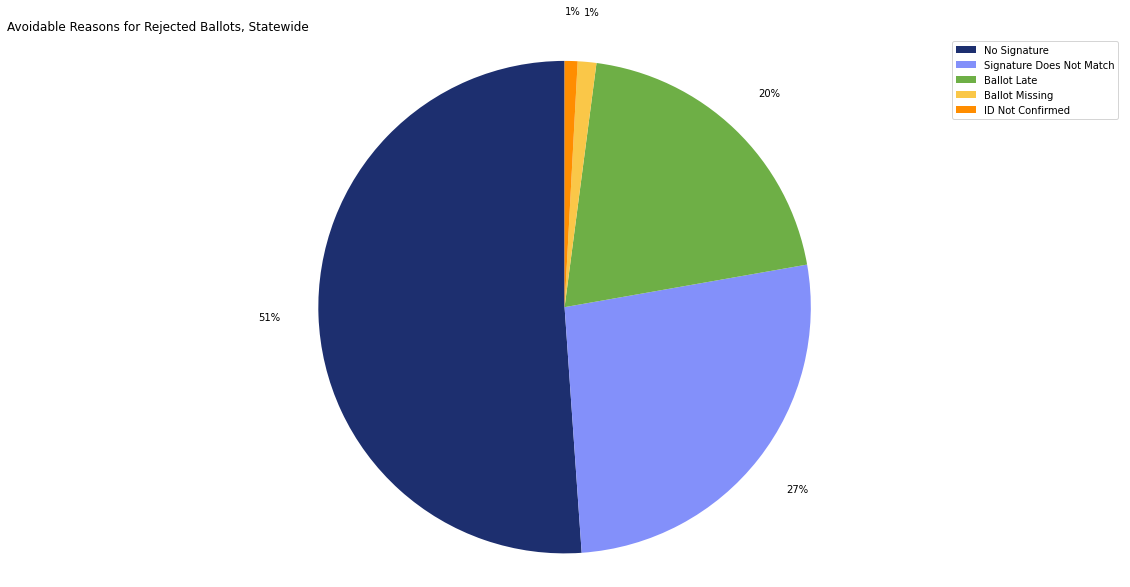

In [33]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

plt.rc('font', size=12)  

labels = 'No Signature', 'Signature Does Not Match', 'Ballot Late','Ballot Missing','ID Not Confirmed'
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748','#FF8D00']

title = 'Avoidable Reasons for Rejected Ballots, Statewide'

fig1, ax1 = plt.subplots(1, figsize=(20,10))
ax1.pie(sw_avoidables[0], labels=labels, colors=colors, autopct='%1.0f%%',
       startangle=90, labeldistance=None, pctdistance=1.2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.savefig('sw_avoidables')
plt.title(title, loc='left')

plt.legend(labels)

plt.show()

In [34]:
ep_rejects = df2.sum(numeric_only=True, axis=0).to_frame().reset_index()

In [35]:
ep_rejects = ep_rejects.sort_values(by=[0],ascending=False)

In [36]:
ep_rejects

index          0
0           BALLOTS ISSUED  1021003.0
1        BALLOTS TABULATED   921454.0
13  TOTAL BALLOTS REJECTED    17764.0
10          VOTED AT POLLS     8929.0
6              VOTER MOVED     4548.0
4              BALLOT LATE     1383.0
2             NO SIGNATURE     1172.0
9           VOTER DECEASED      862.0
3       SIGNATURE NO MATCH      593.0
7          VOTER CANCELLED      174.0
12        ID NOT CONFIRMED       43.0
11   NO BALLOT IN ENVELOPE       41.0
8           VOTER REJECTED       18.0
5          VOTER SENTENCED        1.0

In [37]:
top5 = all_rejections2.iloc[0:5]

In [38]:
top5 = top5.rename({0: 'Number of Ballots'}, axis = 'columns').set_index('index')

In [39]:
top5

level_0  Number of Ballots
index                                     
VOTED AT POLLS       13            25275.0
VOTER MOVED           9            12251.0
BALLOT LATE           7             3556.0
VOTER DECEASED       12             3469.0
NO SIGNATURE          5             1855.0

<ipython-input-40-dea003b2f974>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


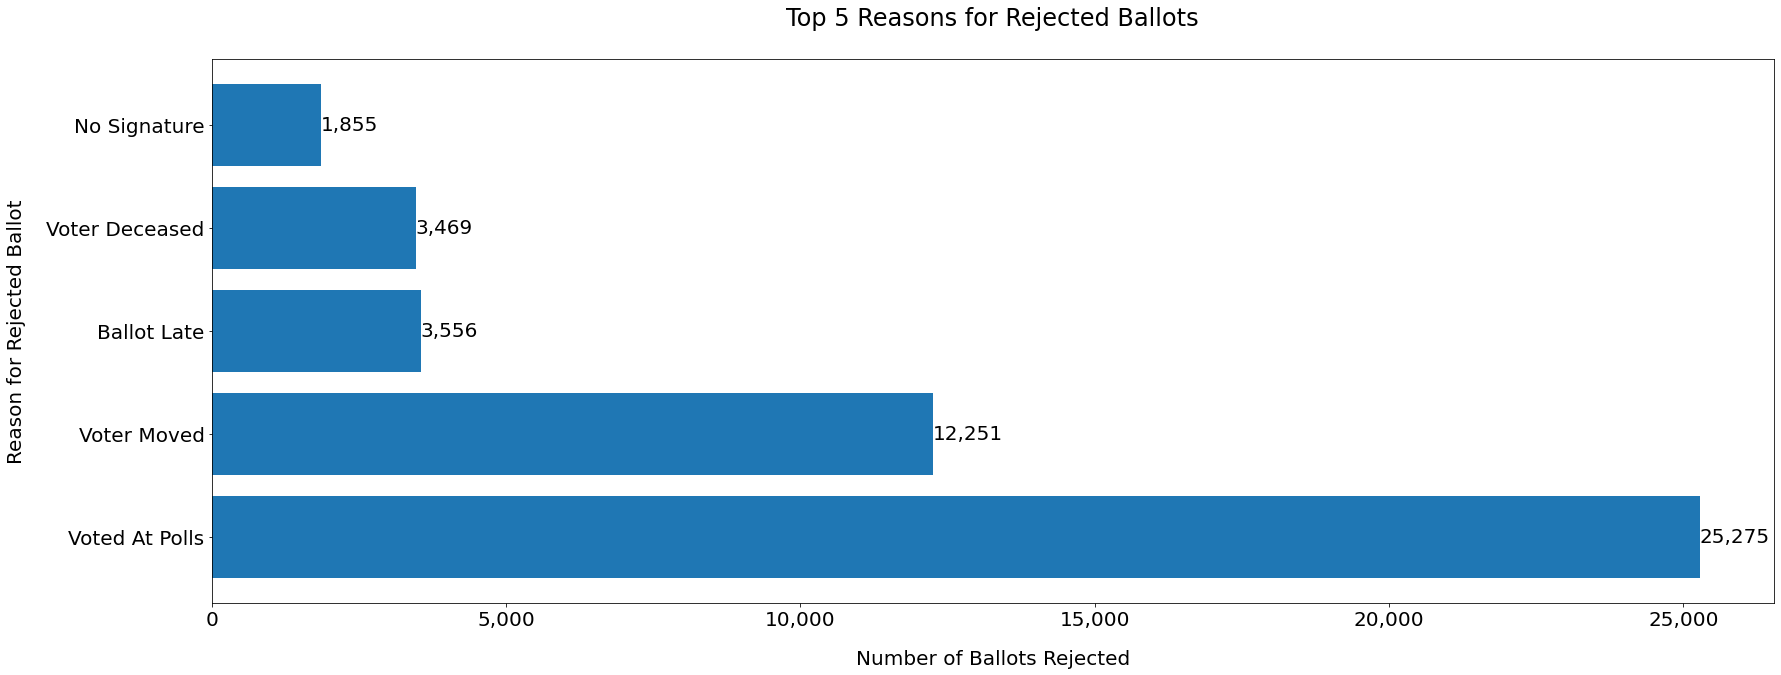

In [40]:
#Make bar chart here 
#Bar chart for smaller jurisdictions first 
# fields = ['VOTED AT POLLS','VOTER MOVED', 'BALLOT LATE','VOTER DECEASED','NO SIGNATURE']
# colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', '#FF8D00']
labels = ['Voted at Polls','Voter Moved','Ballot Late','Voter Deceased','No Signature']

plt.rc('font', size=20) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(28,10))
#plot bars
#left = len(top5) * [0]
# for idx, name in enumerate(fields): 
#     rects = plt.barh(top5.index, small_juris[name], left=left, color=colors[idx])
#     left = left + top5[name]
#     for c in ax.containers: 
#         labels2 = [v.get_width() if v.get_width() > 0 else '' for v in c]
#         ax.bar_label(c, labels=labels2, label_type='center', color='#ffffff', fmt='.0f')
#title, legend, labels

#ax = top5.plot.bar(y='Number of Ballots')

y = ['Voted At Polls','Voter Moved','Ballot Late','Voter Deceased','No Signature']
x = [25275,12251,3556,3469,1855]

plt.barh(y, x, color = '#1D2F6F')
bars = ax.barh(y,x)
ax.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])


plt.title('Top 5 Reasons for Rejected Ballots\n', loc='center')
#plt.legend(labels)
#plt.xticks([0,1,2,3,4],labels=labels)
plt.xlabel('Number of Ballots Rejected', labelpad = 20)
plt.ylabel('Reason for Rejected Ballot', labelpad=20)

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

#remove spines
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
# plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
# ax.set_axisbelow(True)
# ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

In [41]:
df2['OTHER'] = df2['VOTER MOVED'] + df2['VOTER DECEASED'] + df2['VOTED AT POLLS'] + df2['VOTER SENTENCED'] + df2['VOTER CANCELLED'] + df2['VOTER REJECTED']

In [42]:
df2['SIGNATURE ISSUES'] = df2['NO SIGNATURE'] + df2['SIGNATURE NO MATCH']

In [43]:
df2['REJECTED RATE'] = df2['TOTAL BALLOTS REJECTED']/df2['BALLOTS TABULATED']

In [44]:
df2['NO SIG RATE'] = df2['NO SIGNATURE']/df2['TOTAL BALLOTS REJECTED']

In [45]:
df2['ID NOT CONF RATE'] = df2['ID NOT CONFIRMED']/df2['TOTAL BALLOTS REJECTED']

In [46]:
df2['NO MATCH RATE'] = df2['SIGNATURE NO MATCH']/df2['TOTAL BALLOTS REJECTED']

In [47]:
df2['BALLOT LATE RATE'] = df2['BALLOT LATE']/df2['TOTAL BALLOTS REJECTED']

In [48]:
df2['ENV EMPTY RATE'] = df2['NO BALLOT IN ENVELOPE']/df2['TOTAL BALLOTS REJECTED']

In [49]:
sorted = df2.sort_values('TOTAL BALLOTS REJECTED', ascending = False)

In [50]:
sorted.head()

COUNTY           JURISDICTION  BALLOTS ISSUED  \
43      WAYNE COUNTY           DETROIT CITY          202230   
12       KENT COUNTY      GRAND RAPIDS CITY           65723   
18     MACOMB COUNTY  STERLING HEIGHTS CITY           44480   
37  WASHTENAW COUNTY         ANN ARBOR CITY           60541   
19     MACOMB COUNTY            WARREN CITY           42385   

    BALLOTS TABULATED  NO SIGNATURE  SIGNATURE NO MATCH  BALLOT LATE  \
43             174485         627.0                54.0        291.0   
12              59188          15.0                 0.0         49.0   
18              40664          55.0               125.0         79.0   
37              56277          11.0                 3.0        143.0   
19              38412          55.0                58.0         45.0   

    VOTER SENTENCED  VOTER MOVED  VOTER CANCELLED  ...  ID NOT CONFIRMED  \
43              0.0        789.0              1.0  ...               2.0   
12              0.0        425.0             17.0  ...               0.0   
18              0.0        149.0              3.0  ...               0.0   
37              1.0        419.0             25.0  ...               0.0   
19              0.0        133.0              6.0  ...               0.0   

    TOTAL BALLOTS REJECTED   OTHER  SIGNATURE ISSUES  REJECTED RATE  \
43                    2507  1523.0             681.0       0.014368   
12                    2217  2153.0              15.0       0.037457   
18                    1876  1606.0             180.0       0.046134   
37                    1583  1425.0              14.0       0.028129   
19                    1255  1096.0             113.0       0.032672   

    NO SIG RATE  ID NOT CONF RATE  NO MATCH RATE  BALLOT LATE RATE  \
43     0.250100          0.000798       0.021540          0.116075   
12     0.006766          0.000000       0.000000          0.022102   
18     0.029318          0.000000       0.066631          0.042111   
37     0.006949          0.000000       0.001895          0.090335   
19     0.043825          0.000000       0.046215          0.035857   

    ENV EMPTY RATE  
43        0.003989  
12        0.000000  
18        0.005864  
37        0.000632  
19        0.000797  

[5 rows x 24 columns]

In [51]:
list(sorted.columns)

['COUNTY',
 'JURISDICTION',
 'BALLOTS ISSUED',
 'BALLOTS TABULATED',
 'NO SIGNATURE',
 'SIGNATURE NO MATCH',
 'BALLOT LATE',
 'VOTER SENTENCED',
 'VOTER MOVED',
 'VOTER CANCELLED',
 'VOTER REJECTED',
 'VOTER DECEASED',
 'VOTED AT POLLS',
 'NO BALLOT IN ENVELOPE',
 'ID NOT CONFIRMED',
 'TOTAL BALLOTS REJECTED',
 'OTHER',
 'SIGNATURE ISSUES',
 'REJECTED RATE',
 'NO SIG RATE',
 'ID NOT CONF RATE',
 'NO MATCH RATE',
 'BALLOT LATE RATE',
 'ENV EMPTY RATE']

In [52]:
numbers_df = sorted[['JURISDICTION','NO SIGNATURE','SIGNATURE NO MATCH','BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED']]

In [53]:
numbers_df['ADMIN TOTALS'] = numbers_df['NO SIGNATURE'] + numbers_df['SIGNATURE NO MATCH'] + numbers_df['BALLOT LATE'] + numbers_df['NO BALLOT IN ENVELOPE'] + numbers_df['ID NOT CONFIRMED']

<ipython-input-53-38bfa366324d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numbers_df['ADMIN TOTALS'] = numbers_df['NO SIGNATURE'] + numbers_df['SIGNATURE NO MATCH'] + numbers_df['BALLOT LATE'] + numbers_df['NO BALLOT IN ENVELOPE'] + numbers_df['ID NOT CONFIRMED']


In [54]:
numbers_df.shape

(50, 7)

In [55]:
list(numbers_df.columns)

['JURISDICTION',
 'NO SIGNATURE',
 'SIGNATURE NO MATCH',
 'BALLOT LATE',
 'NO BALLOT IN ENVELOPE',
 'ID NOT CONFIRMED',
 'ADMIN TOTALS']

In [56]:
numbers_df = numbers_df.rename(columns={'ADMIN TOTALS':'ADMIN_TOTALS'})
#.sort_values(by='ADMIN_TOTALS',ascending=False).astype(int)

In [57]:
numbers_df['NO SIG RATE'] = numbers_df['NO SIGNATURE']/numbers_df['ADMIN_TOTALS'] * 100

In [58]:
numbers_df['NO MATCH RATE'] = numbers_df['SIGNATURE NO MATCH']/numbers_df['ADMIN_TOTALS'] * 100

In [59]:
numbers_df['BALLOT LATE RATE'] = numbers_df['BALLOT LATE']/numbers_df['ADMIN_TOTALS'] * 100

In [60]:
numbers_df['NO BALLOT RATE'] = numbers_df['NO BALLOT IN ENVELOPE']/numbers_df['ADMIN_TOTALS'] * 100

In [61]:
numbers_df['ID NOT CONF RATE'] = numbers_df['ID NOT CONFIRMED']/numbers_df['ADMIN_TOTALS'] * 100

In [62]:
numbers_df2 = numbers_df[['JURISDICTION','NO SIGNATURE','SIGNATURE NO MATCH','BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED','ADMIN_TOTALS']]

In [63]:
numbers_df2 = numbers_df2.set_index('JURISDICTION')

In [64]:
missing_jurisdictions = numbers_df2[numbers_df2.ADMIN_TOTALS == 0]

In [65]:
omitted_jurisdictions = list(missing_jurisdictions.index)

In [66]:
omitted_jurisdictions

['RIVER ROUGE CITY',
 'BUENA VISTA CHARTER TOWNSHIP',
 'COVERT TOWNSHIP',
 'HARRIS TOWNSHIP',
 'CLYDE TOWNSHIP',
 'ROYAL OAK TOWNSHIP']

In [67]:
numbers_df3 = numbers_df2[numbers_df2.ADMIN_TOTALS != 0.0]

In [68]:
numbers_df3 = numbers_df3.sort_values(by='ADMIN_TOTALS',ascending=False).astype(int)

In [69]:
transposed = numbers_df3.transpose()

In [70]:
column_names = list(transposed.columns)

In [71]:
transposed['TOTALS'] = transposed[column_names].sum(axis=1)

In [72]:
transposed2 = transposed.drop(index = ('ADMIN_TOTALS'))

In [73]:
piechart = transposed2[['TOTALS']]

In [74]:
piechart

JURISDICTION           TOTALS
NO SIGNATURE             1172
SIGNATURE NO MATCH        593
BALLOT LATE              1383
NO BALLOT IN ENVELOPE      41
ID NOT CONFIRMED           43

findfont: Font family ['font'] not found. Falling back to DejaVu Sans.


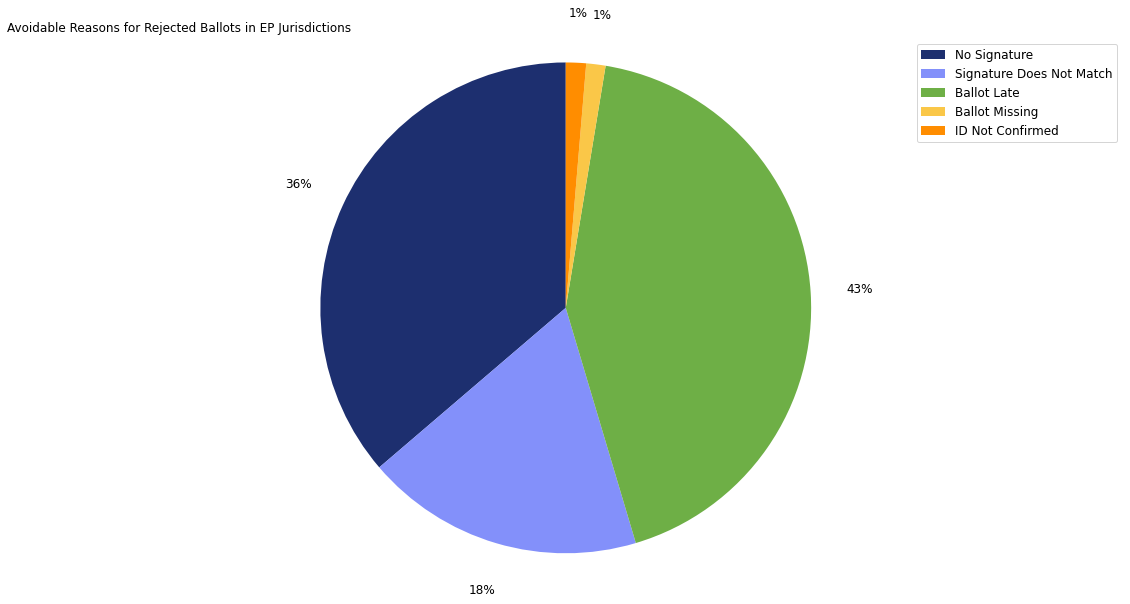

In [75]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

plt.rc('font', size=12)  

labels = 'No Signature', 'Signature Does Not Match', 'Ballot Late','Ballot Missing','ID Not Confirmed'
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748','#FF8D00']
title = 'Avoidable Reasons for Rejected Ballots in EP Jurisdictions'

fig1, ax1 = plt.subplots(1, figsize=(20,10))
ax1.pie(piechart['TOTALS'], labels=labels, colors=colors, autopct='%1.0f%%',
       startangle=90, labeldistance=None, pctdistance=1.2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(title, loc = 'left', font='font')

plt.legend(labels)

plt.savefig('ep_avoidables_pie')
plt.show()

Code for the below plot courtesy of [Thiago Carvalho](https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7).

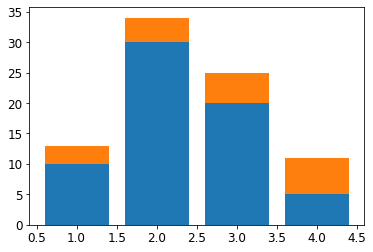

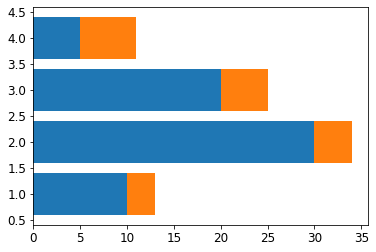

In [76]:
plt.bar([1,2,3,4], [10,30,20,5])
plt.bar([1,2,3,4], [3,4,5,6], bottom = [10,30,20,5])
plt.show()
plt.barh([1,2,3,4], [10,30,20,5])
plt.barh([1,2,3,4], [3,4,5,6], left = [10,30,20,5])
plt.show()

In [77]:
small_juris = numbers_df2[numbers_df2.ADMIN_TOTALS < 60]

In [78]:
large_juris = numbers_df2[(numbers_df2.ADMIN_TOTALS >= 60) & (numbers_df2.ADMIN_TOTALS <= 900)]

In [79]:
detroit = numbers_df2[numbers_df2.ADMIN_TOTALS > 900]

In [80]:
print(numbers_df2.shape)
print(small_juris.shape)
print(large_juris.shape)
print(detroit.shape)

(50, 6)
(35, 6)
(14, 6)
(1, 6)


In [81]:
sorted_small_juris = small_juris.sort_values(by='JURISDICTION',ascending=False).astype('int')

In [82]:
sorted_small_juris

NO SIGNATURE  SIGNATURE NO MATCH  BALLOT LATE  \
JURISDICTION                                                                  
YPSILANTI TOWNSHIP                      11                   7           11   
YPSILANTI CITY                           4                   0            5   
WYOMING CITY                            12                  20           17   
ROYAL OAK TOWNSHIP                       0                   0            0   
RIVER ROUGE CITY                         0                   0            0   
REDFORD TOWNSHIP                        13                   0           20   
PORT HURON CITY                          1                   3            7   
PONTIAC CITY                            26                   4           18   
OAK PARK CITY                           22                   0            9   
MUSKEGON HEIGHTS CITY                    7                   4            3   
MUSKEGON CITY                            0                   1            8   
MOUNT PLEASANT CITY                      2                   0            8   
MARQUETTE CITY                           4                   1            9   
KALAMAZOO CITY                          18                   8           27   
HOLLAND TOWNSHIP                         6                  10           14   
HOLLAND CITY                             3                  11           16   
HIGHLAND PARK CITY                       4                   3           11   
HARRIS TOWNSHIP                          0                   0            0   
HARPER WOODS CITY                        3                   0            9   
HAMTRAMCK CITY                          13                   4           10   
FLINT TOWNSHIP                          18                   0            8   
ECORSE CITY                              1                   0            8   
EASTPOINTE CITY                          3                   8           16   
EAST LANSING CITY                        4                   1           31   
DEARBORN HEIGHTS CITY                   22                  11           26   
COVERT TOWNSHIP                          0                   0            0   
CLYDE TOWNSHIP                           0                   0            0   
CENTER LINE CITY                         2                   3            4   
BUENA VISTA CHARTER TOWNSHIP             0                   0            0   
BENTON HARBOR CITY                       4                   3            2   
BENTON CHARTER TOWNSHIP                  2                   0            0   
BAY CITY CITY                            1                  15            3   
BATTLE CREEK CITY                        0                  18           10   
ALLENDALE TOWNSHIP                       0                   0            6   
ALBION CITY                              0                   2            1   

                              NO BALLOT IN ENVELOPE  ID NOT CONFIRMED  \
JURISDICTION                                                            
YPSILANTI TOWNSHIP                                0                 0   
YPSILANTI CITY                                    0                 0   
WYOMING CITY                                      1                 1   
ROYAL OAK TOWNSHIP                                0                 0   
RIVER ROUGE CITY                                  0                 0   
REDFORD TOWNSHIP                                  0                 0   
PORT HURON CITY                                   0                 1   
PONTIAC CITY                                      1                 0   
OAK PARK CITY                                     0                 0   
MUSKEGON HEIGHTS CITY                             0                 0   
MUSKEGON CITY                                     0                 7   
MOUNT PLEASANT CITY                               0                 0   
MARQUETTE CITY                                    1                 0   
KALAMAZOO C

In [83]:
sorted_small_juris_clipped = sorted_small_juris.loc[sorted_small_juris['ADMIN_TOTALS'] != 0.0]

In [84]:
print(sorted_small_juris.shape)
print(sorted_small_juris_clipped.shape)

(35, 6)
(29, 6)


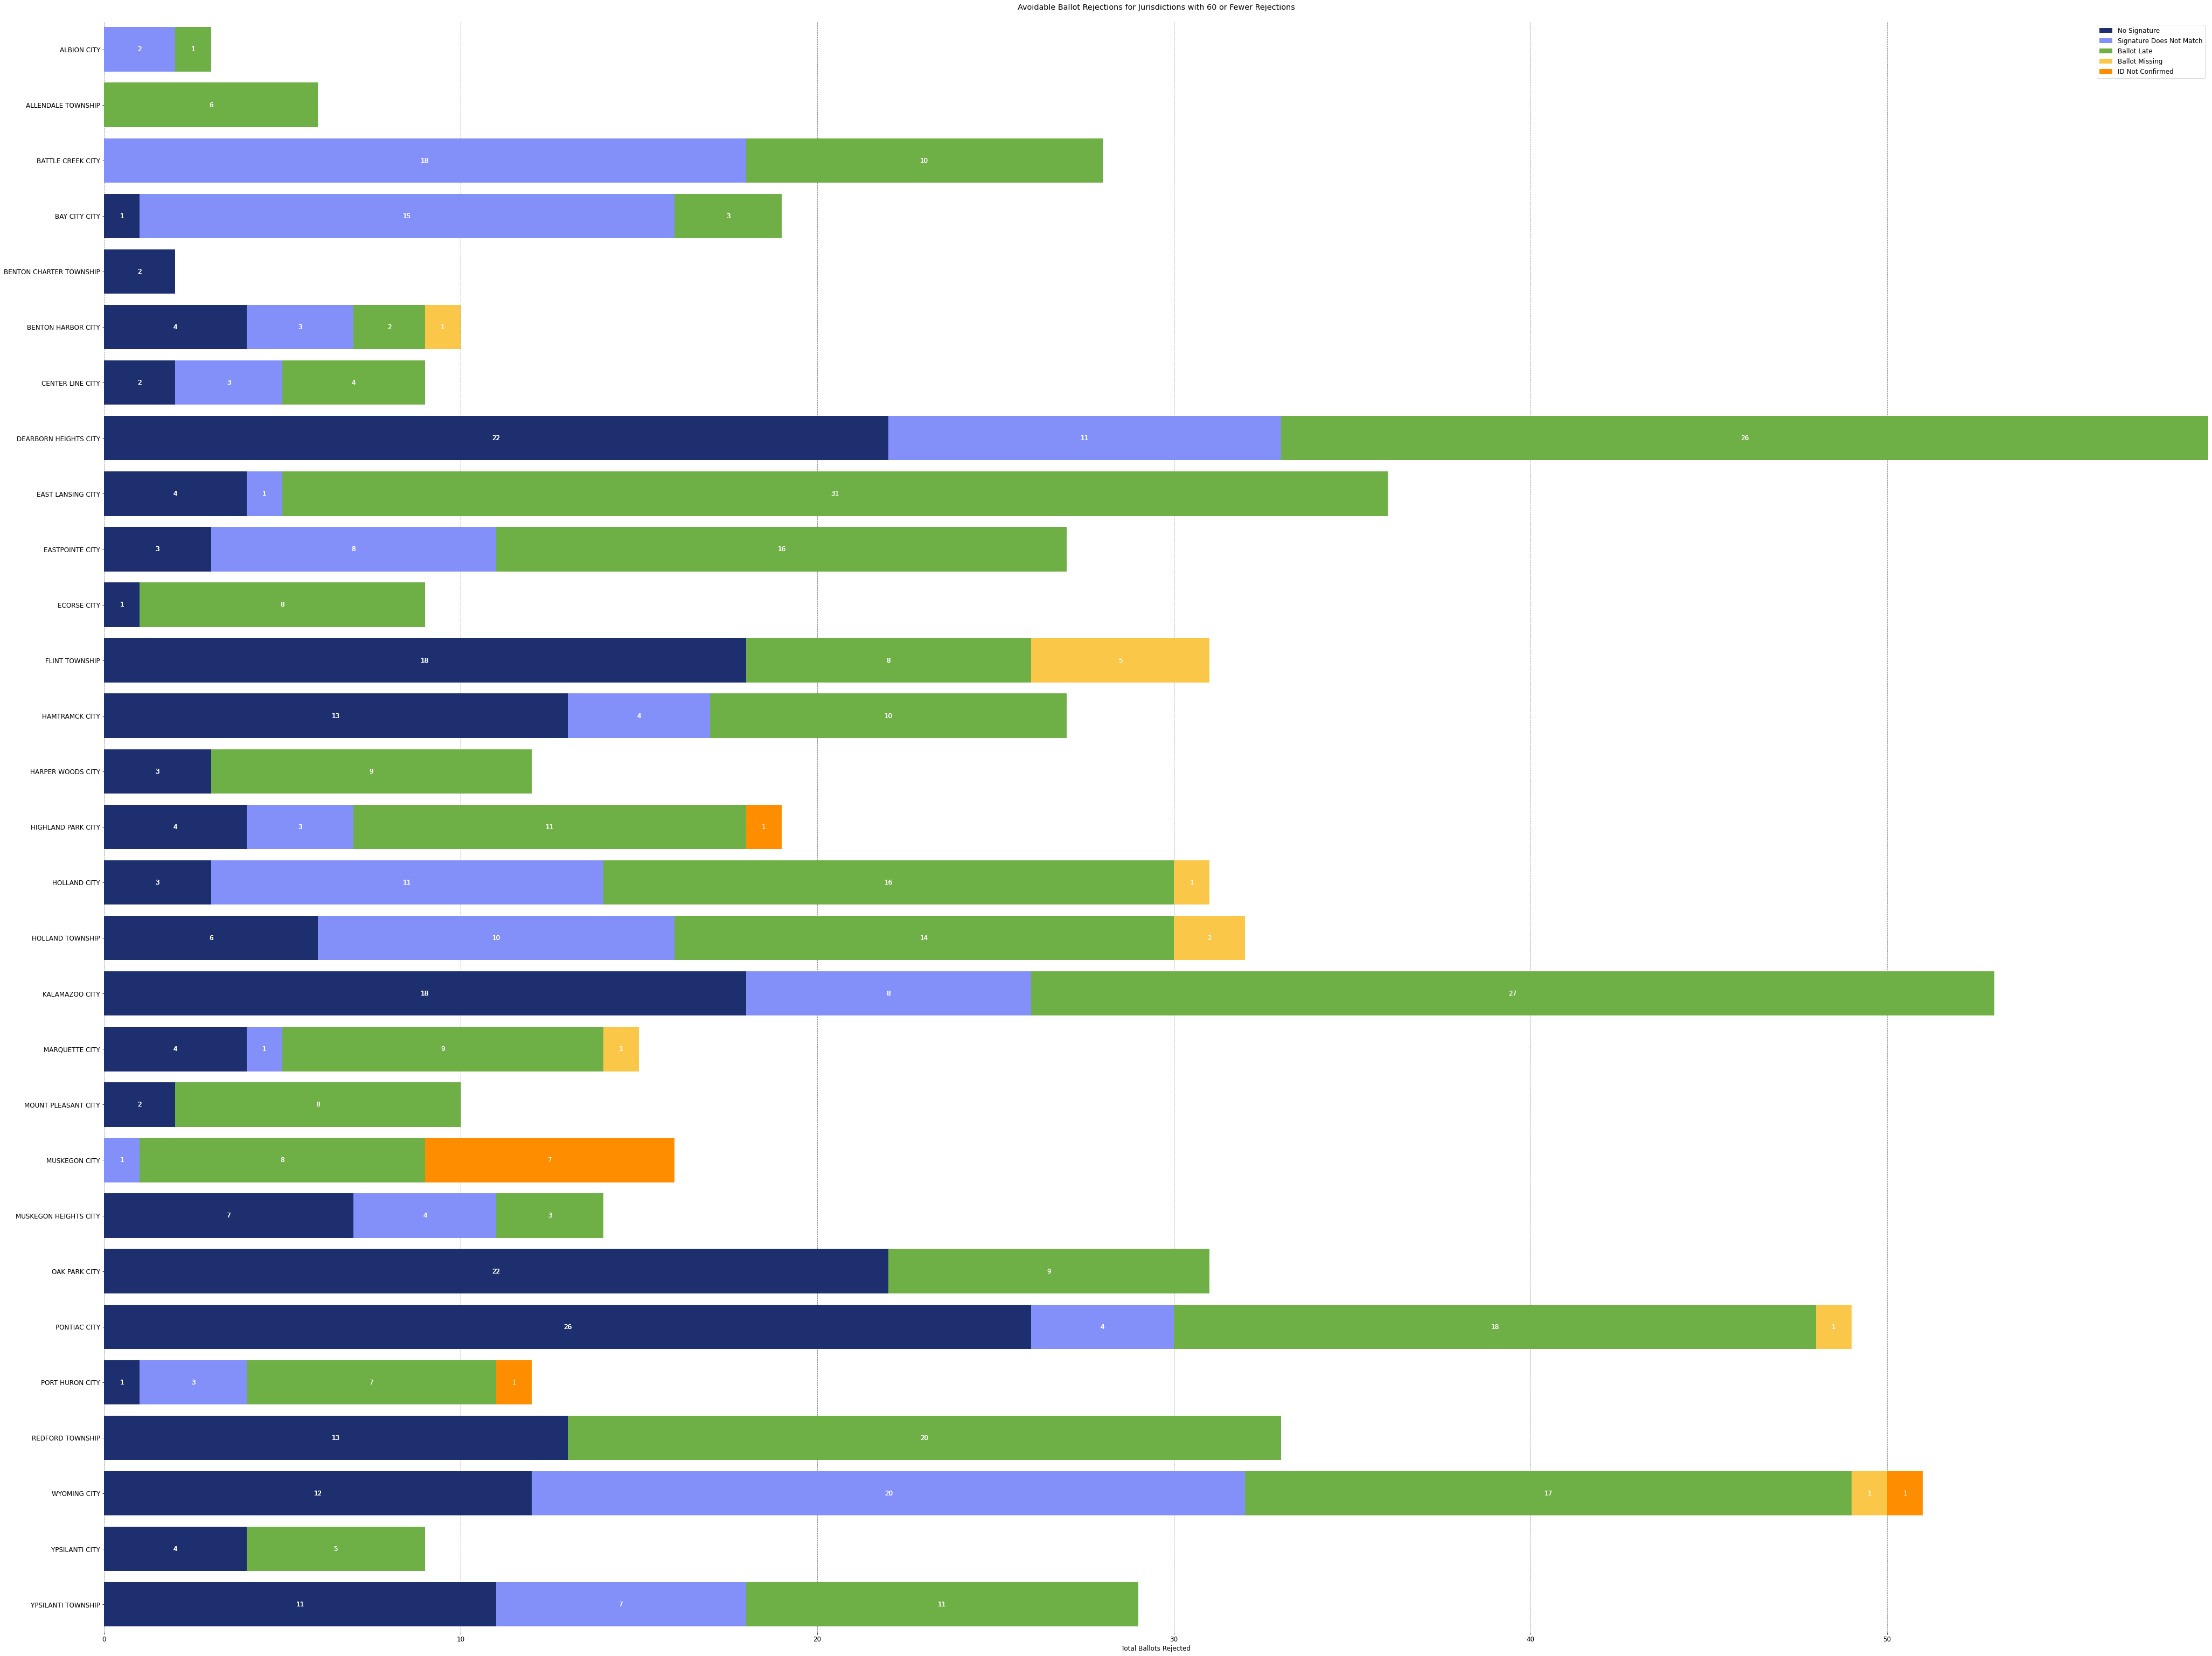

In [85]:
#Bar chart for smaller jurisdictions first 
fields = ['NO SIGNATURE','SIGNATURE NO MATCH', 'BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', '#FF8D00']
labels = ['No Signature','Signature Does Not Match','Ballot Late','Ballot Missing','ID Not Confirmed']

#figure and axis
fig, ax = plt.subplots(1, figsize=(70,55))
#plot bars
left = len(sorted_small_juris_clipped) * [0]
for idx, name in enumerate(fields): 
    rects = plt.barh(sorted_small_juris_clipped.index, sorted_small_juris_clipped[name], left=left, color=colors[idx])
    left = left + sorted_small_juris_clipped[name]
    for c in ax.containers: 
        labels2 = [v.get_width() if v.get_width() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels2, label_type='center', color='#ffffff', fmt='.0f')
#title, legend, labels
plt.title('Avoidable Ballot Rejections for Jurisdictions with 60 or Fewer Rejections\n', loc='center')
plt.legend(labels)
plt.xlabel('Total Ballots Rejected')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.rc('font', **font)

#plt.savefig('revised_small_juris_chart')

plt.show();

#Royal Oak Township, Harris Township, Holland Township, Clyde Township, Covert Township, Buena Vista Charter Township, 
#and River Rouge City are not shown in graphs because they had zero rejected ballots in 2020. 

In [86]:
sorted_large_juris = large_juris.sort_values(by='JURISDICTION',ascending=False).astype('int')

In [87]:
sorted_large_juris_clipped = sorted_large_juris.loc[sorted_large_juris['ADMIN_TOTALS'] != 0.0]

In [88]:
print(sorted_large_juris.shape)
print(sorted_large_juris_clipped.shape)

(14, 6)
(14, 6)


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


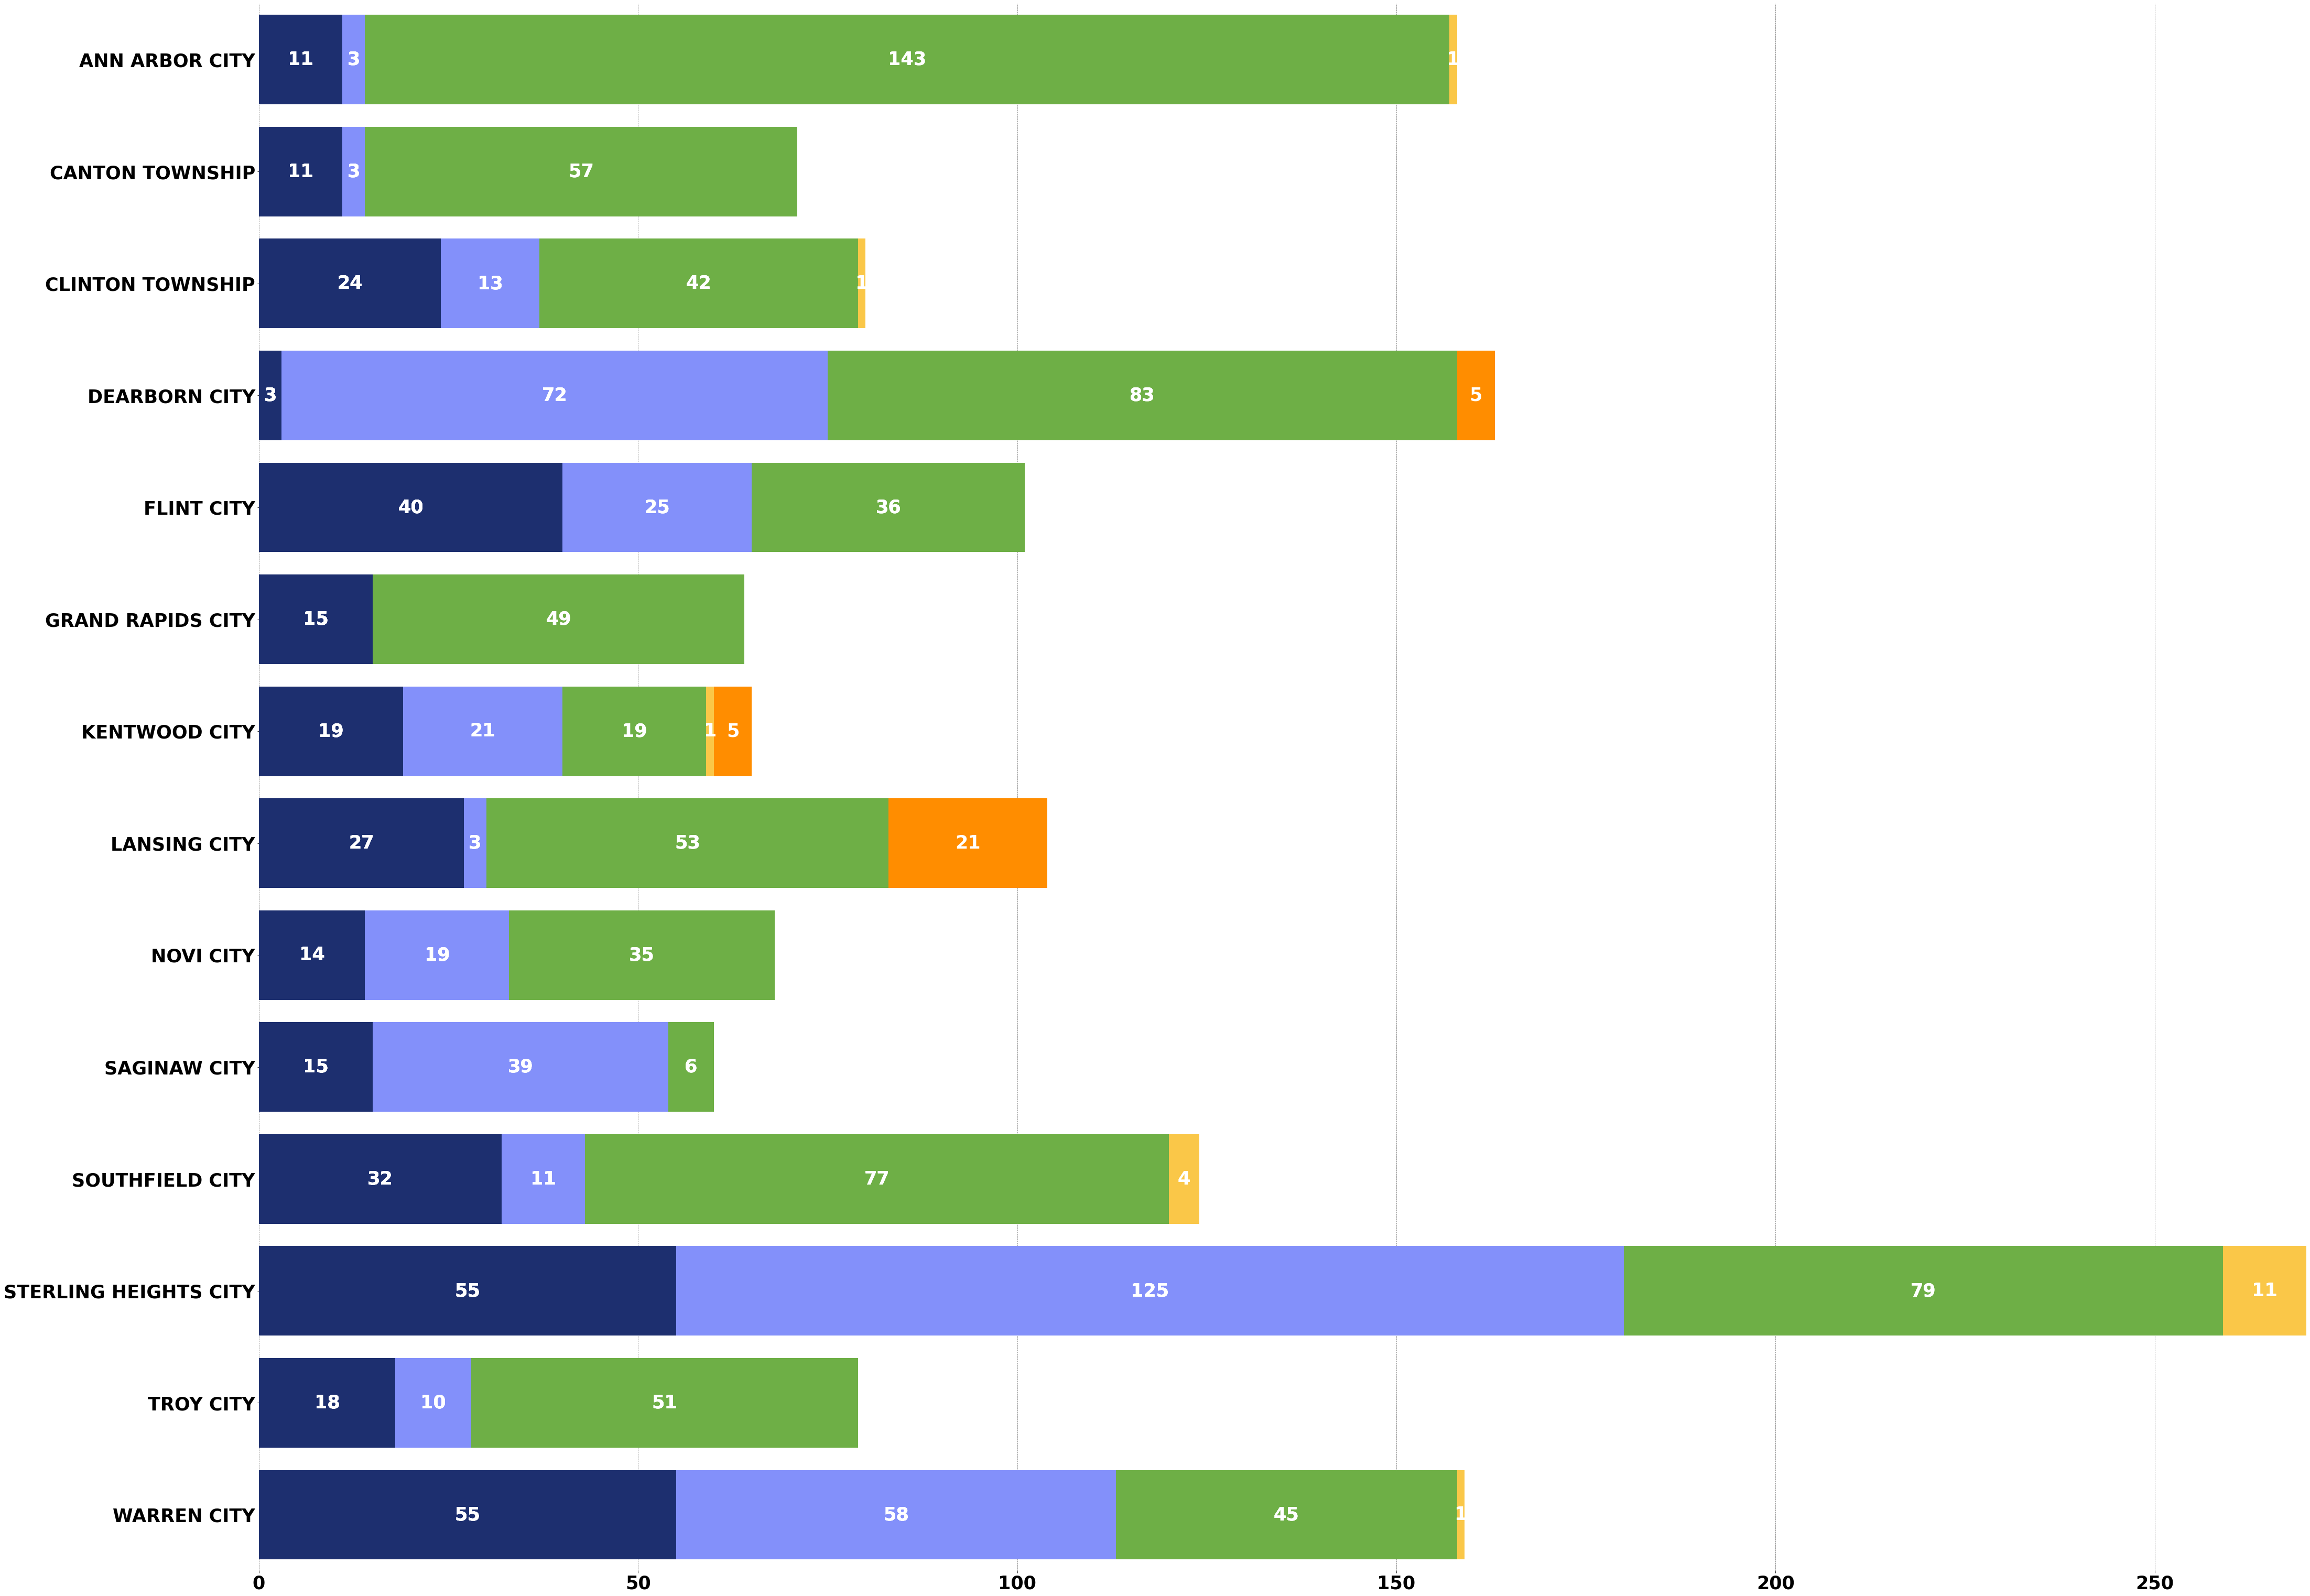

In [89]:
#Bar chart for larger jurisdictions next 
fields = ['NO SIGNATURE','SIGNATURE NO MATCH', 'BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', '#FF8D00']
labels = ['No Signature','Signature Does Not Match','Ballot Late','Ballot Missing','ID Not Confirmed']

plt.rc('font', size=35) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(70,55))
#plot bars
left = len(large_juris) * [0]
for idx, name in enumerate(fields): 
    rects = plt.barh(sorted_large_juris_clipped.index, sorted_large_juris_clipped[name], left=left, color=colors[idx])
    left = left + sorted_large_juris_clipped[name]
    for c in ax.containers: 
        labels2 = [v.get_width() if v.get_width() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels2, label_type='center', color='#ffffff', fmt='.0f')
#title, legend, labels
#plt.title('Administrative Ballot Rejections for Jurisdictions, 60-200 Rejections\n', loc='center')
#plt.legend(labels)
#plt.xlabel('Total Ballots Rejected')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.rc('font', **font)

plt.savefig('revised-med-juris-chart.png')

plt.show()

In [90]:
detroit = detroit.astype(int)

In [91]:
detroit

NO SIGNATURE  SIGNATURE NO MATCH  BALLOT LATE  \
JURISDICTION                                                  
DETROIT CITY           627                  54          291   

              NO BALLOT IN ENVELOPE  ID NOT CONFIRMED  ADMIN_TOTALS  
JURISDICTION                                                         
DETROIT CITY                     10                 2           984

In [92]:
detroit_pie = detroit[['NO SIGNATURE','SIGNATURE NO MATCH','BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED']].transpose()

In [93]:
detroit_pie

JURISDICTION           DETROIT CITY
NO SIGNATURE                    627
SIGNATURE NO MATCH               54
BALLOT LATE                     291
NO BALLOT IN ENVELOPE            10
ID NOT CONFIRMED                  2

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


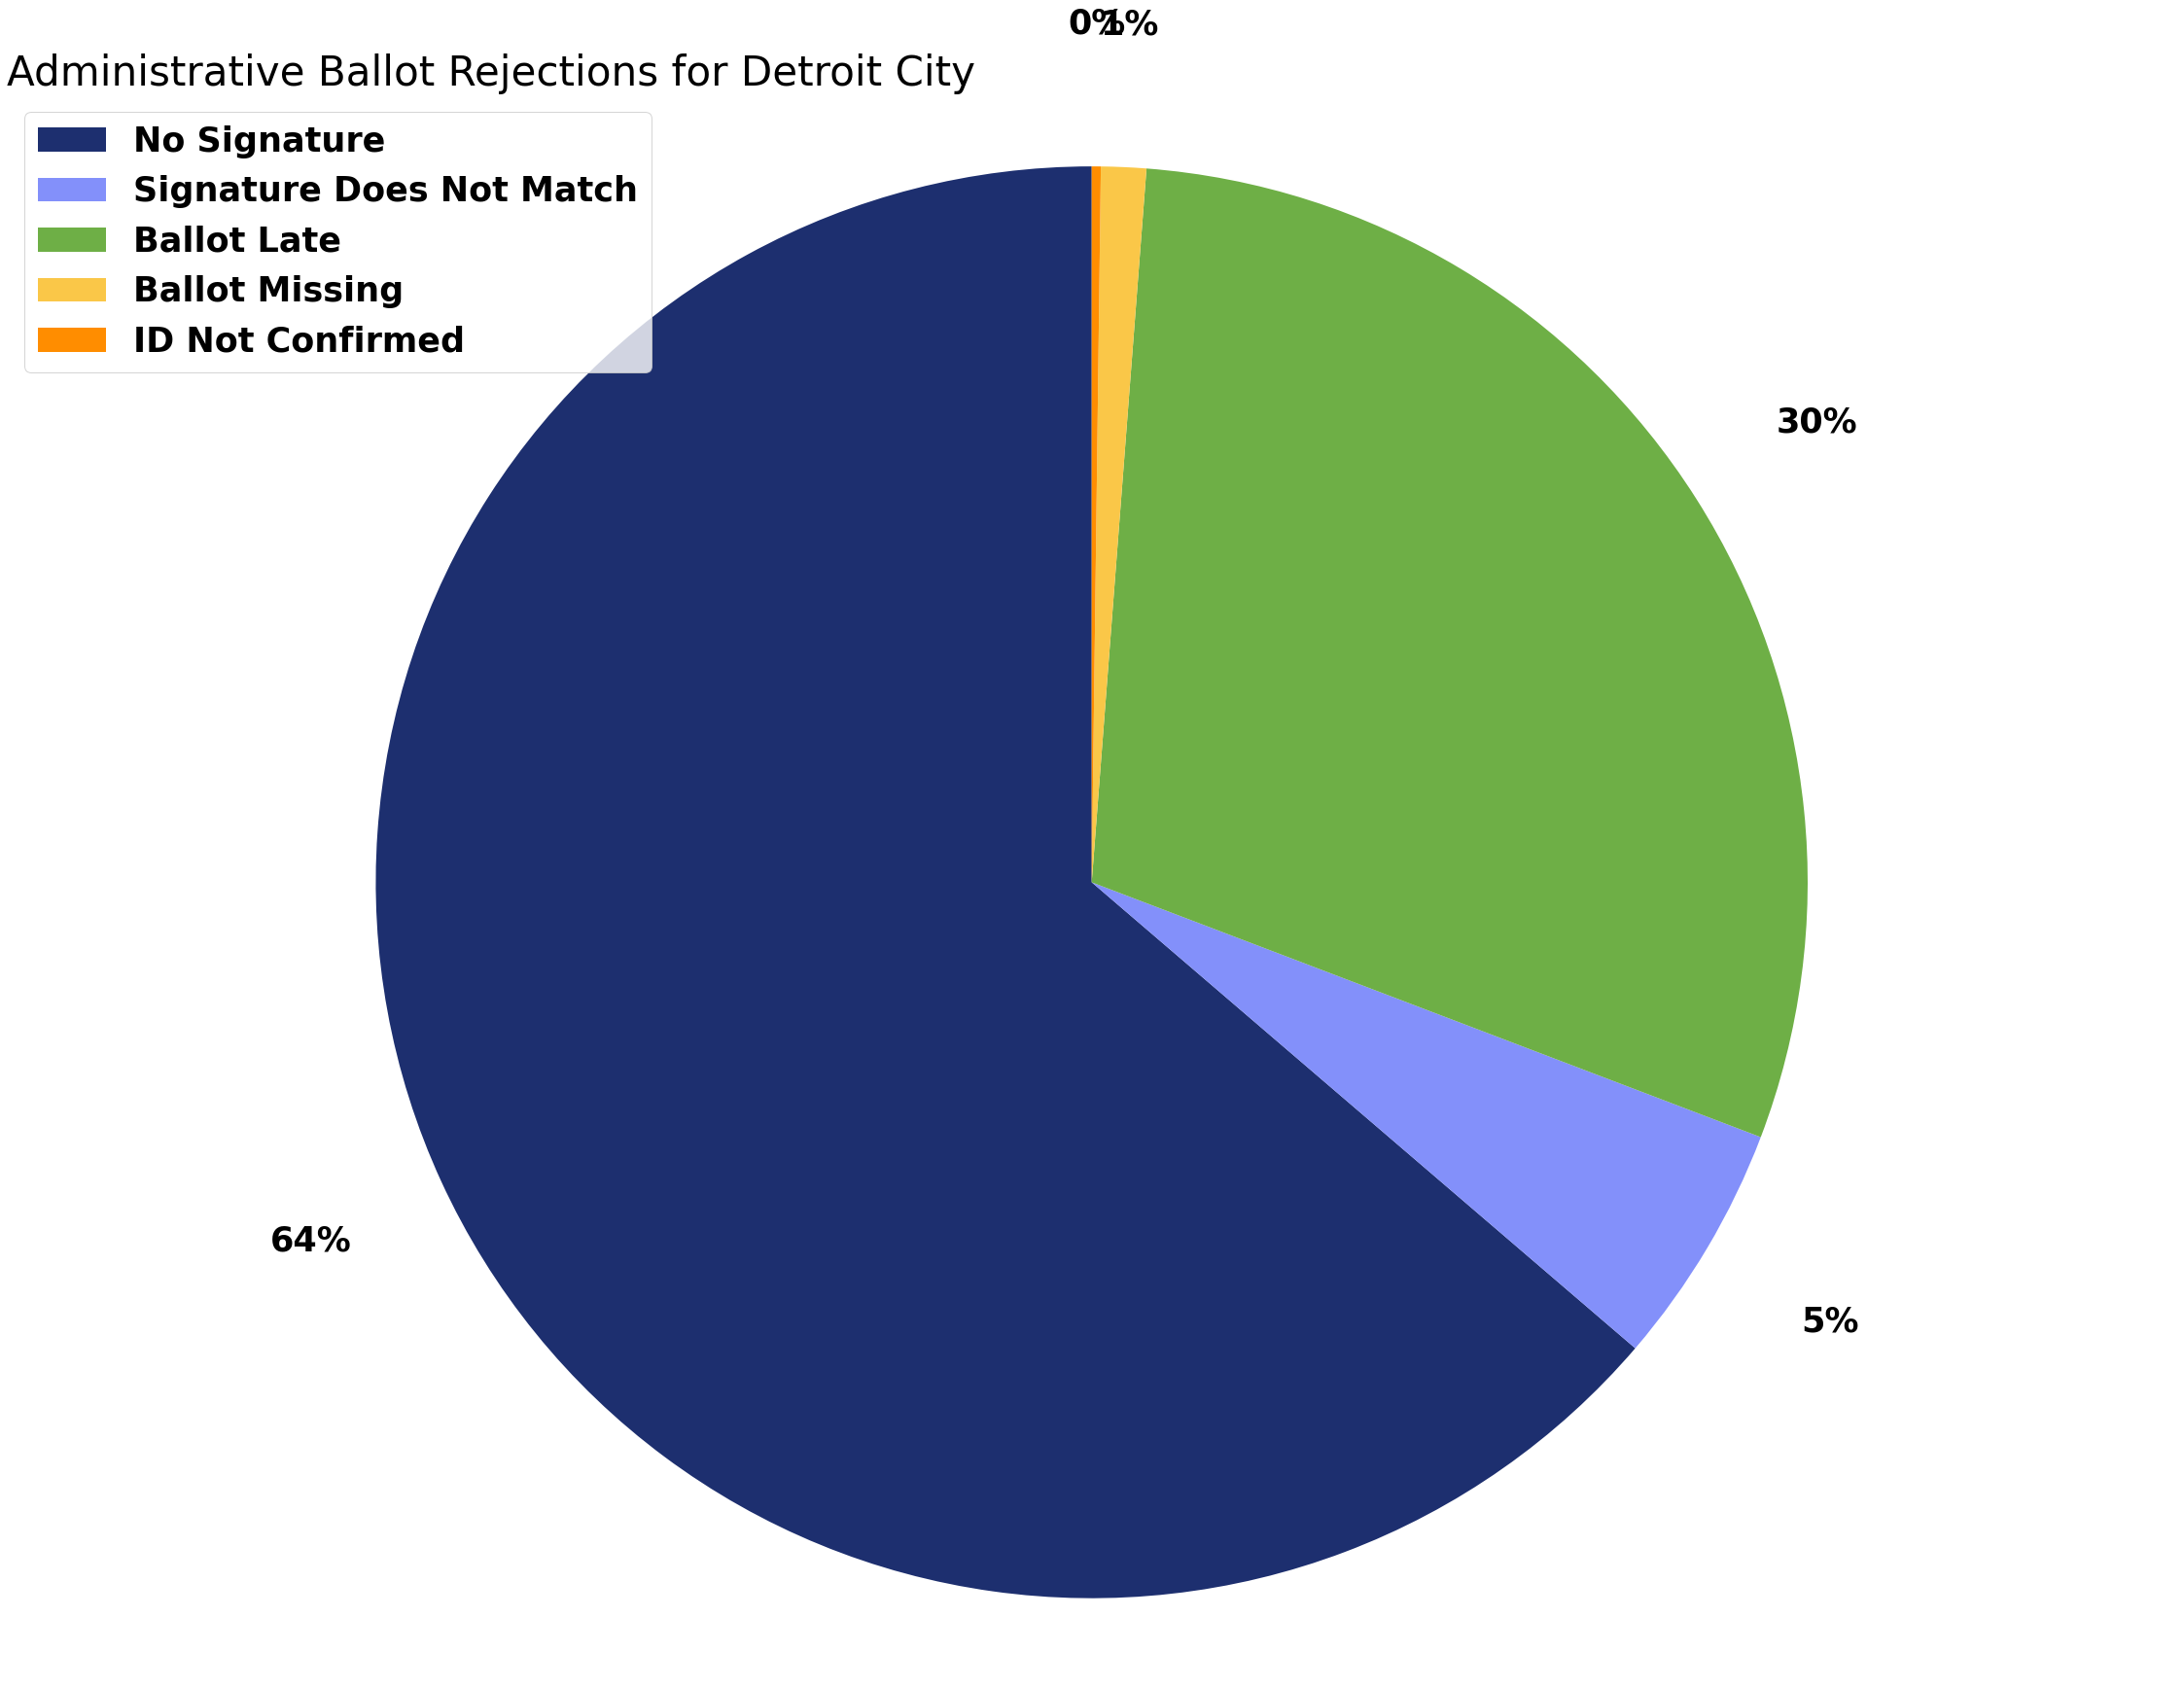

In [94]:
# Pie chart for Detroit
plt.rc('font', size=35)  

labels = 'No Signature', 'Signature Does Not Match', 'Ballot Late','Ballot Missing','ID Not Confirmed'
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748','#FF8D00']
title = 'Administrative Ballot Rejections for Detroit City'

fig1, ax1 = plt.subplots(1, figsize=(40,30))
ax1.pie(detroit_pie['DETROIT CITY'], labels=labels, colors=colors, autopct='%1.0f%%',
       startangle=90, labeldistance=None, pctdistance=1.2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(title, loc='left')

plt.legend(labels)

plt.savefig('detroit_pie.png')

plt.show()

In [95]:
#Lastly, bar chart for Detroit
fields = ['NO SIGNATURE','SIGNATURE NO MATCH', 'BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', '#FF8D00']
labels = ['No Signature','Signature Does Not Match','Ballot Late','Ballot Missing','ID Not Confirmed']

plt.rc('font', size=200) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(200,150))
#plot bars
left = len(detroit) * [0]
for idx, name in enumerate(fields): 
    rects = plt.barh(detroit.index, detroit[name], left=left, color=colors[idx], height=.5)
    left = left + detroit[name]
    for c in ax.containers: 
        labels2 = [v.get_width() if v.get_width() > 10 else '' for v in c]
        ax.bar_label(c, labels=labels2, label_type='center', color='#ffffff', fmt='.0f')
#title, legend, labels
plt.title('Administrative Ballot Rejections for Detroit City\n', loc='center')
plt.legend(labels)
plt.xlabel('Total Ballots Rejected')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.savefig('revised-detroit-bar')

plt.show()

#Add in marks for ballot missing (10) and ID not confirmed (2) later

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


In [96]:
list(numbers_df.columns)

['JURISDICTION',
 'NO SIGNATURE',
 'SIGNATURE NO MATCH',
 'BALLOT LATE',
 'NO BALLOT IN ENVELOPE',
 'ID NOT CONFIRMED',
 'ADMIN_TOTALS',
 'NO SIG RATE',
 'NO MATCH RATE',
 'BALLOT LATE RATE',
 'NO BALLOT RATE',
 'ID NOT CONF RATE']

In [101]:
ratesdf = numbers_df[['JURISDICTION','NO SIG RATE','NO MATCH RATE','BALLOT LATE RATE','NO BALLOT RATE','ID NOT CONF RATE']].sort_values(by='JURISDICTION', ascending=False)

In [102]:
ratesdf = ratesdf.dropna().round(1).set_index('JURISDICTION')

In [103]:
ratesdf

NO SIG RATE  NO MATCH RATE  BALLOT LATE RATE  \
JURISDICTION                                                            
YPSILANTI TOWNSHIP              37.9           24.1              37.9   
YPSILANTI CITY                  44.4            0.0              55.6   
WYOMING CITY                    23.5           39.2              33.3   
WARREN CITY                     34.6           36.5              28.3   
TROY CITY                       22.8           12.7              64.6   
STERLING HEIGHTS CITY           20.4           46.3              29.3   
SOUTHFIELD CITY                 25.8            8.9              62.1   
SAGINAW CITY                    25.0           65.0              10.0   
REDFORD TOWNSHIP                39.4            0.0              60.6   
PORT HURON CITY                  8.3           25.0              58.3   
PONTIAC CITY                    53.1            8.2              36.7   
OAK PARK CITY                   71.0            0.0              29.0   
NOVI CITY                       20.6           27.9              51.5   
MUSKEGON HEIGHTS CITY           50.0           28.6              21.4   
MUSKEGON CITY                    0.0            6.2              50.0   
MOUNT PLEASANT CITY             20.0            0.0              80.0   
MARQUETTE CITY                  26.7            6.7              60.0   
LANSING CITY                    26.0            2.9              51.0   
KENTWOOD CITY                   29.2           32.3              29.2   
KALAMAZOO CITY                  34.0           15.1              50.9   
HOLLAND TOWNSHIP                18.8           31.2              43.8   
HOLLAND CITY                     9.7           35.5              51.6   
HIGHLAND PARK CITY              21.1           15.8              57.9   
HARPER WOODS CITY               25.0            0.0              75.0   
HAMTRAMCK CITY                  48.1           14.8              37.0   
GRAND RAPIDS CITY               23.4            0.0              76.6   
FLINT TOWNSHIP                  58.1            0.0              25.8   
FLINT CITY                      39.6           24.8              35.6   
ECORSE CITY                     11.1            0.0              88.9   
EASTPOINTE CITY                 11.1           29.6              59.3   
EAST LANSING CITY               11.1            2.8              86.1   
DETROIT CITY                    63.7            5.5              29.6   
DEARBORN HEIGHTS CITY           37.3           18.6              44.1   
DEARBORN CITY                    1.8           44.2              50.9   
CLINTON TOWNSHIP                30.0           16.2              52.5   
CENTER LINE CITY                22.2           33.3              44.4   
CANTON TOWNSHIP                 15.5            4.2              80.3   
BENTON HARBOR CITY              40.0           30.0              20.0   
BENTON CHARTER TOWNSHIP        100.0            0.0               0.0   
BAY CITY CITY                    5.3           78.9              15.8   
BATTLE CREEK CITY                0.0           64.3              35.7   
ANN ARBOR CITY                   7.0            1.9              90.5   
ALLENDALE TOWNSHIP               0.0            0.0             100.0   
ALBION CITY                      0.0           66.7              33.3   

                         NO BALLOT RATE  ID NOT CONF RATE  
JURISDICTION                                               
YPSILANTI TOWNSHIP                  0.0               0.0  
YPSILANTI CITY                      0.0               0.0  
WYOMING CITY                        2.0               2.0  
WARREN CITY                         0.6               0.0  
TROY CITY                           0.0               0.0  
STERLING HEIGHTS CITY               4.1               0.0  
SOUTHFIELD CITY                     3.2               0.0  
SAGINAW CITY                        0.0               0.0  
REDFORD TOWNSHIP                    0.0               0.0  
PORT H

In [107]:
fields4 = ['NO SIG RATE', 'NO MATCH RATE','BALLOT LATE RATE','NO BALLOT RATE','ID NOT CONF RATE']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', '#FF8D00']
labels = ['Signature Issues','Signature Does Not Match','Ballot Late','Ballot Missing','ID Not Confirmed']

plt.rc('font', size=80) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(100,200))
#plot bars
left = len(ratesdf) * [0]
for idx, name in enumerate(fields4): 
    plt.barh(ratesdf.index, ratesdf[name], left=left, color=colors[idx], height=.75)
    left = left + ratesdf[name]
    for c in ax.containers: 
        labels2 = [f'{v.get_width():.0f}%' if v.get_width() > 0.5 else '' for v in c]
        ax.bar_label(c, labels=labels2, label_type='center', color='#ffffff',fmt='.1f')
#title, legend, labels
#plt.title('Administrative Rejections by Jurisdiction\n', loc='left')
#plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
#plt.xlabel('Percentage of Ballots Rejected for Administrative Reasons')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.savefig('revised-rate-chart.png',bbox_inches='tight')
#plt.tight_layout()
plt.show()

In [ ]:
clipped = sorted.loc[sorted['TOTAL BALLOTS REJECTED'] > 300]

In [ ]:
clipped.shape

In [ ]:
clipped

In [ ]:
list(clipped.columns)

In [ ]:
chart1 = clipped[['JURISDICTION','TOTAL BALLOTS REJECTED', 'SIGNATURE ISSUES','BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED','OTHER']]

In [ ]:
chart1 = chart1.set_index('JURISDICTION')

In [ ]:
#Signature issues = either the ballot wasn't signed or the signature did not match
chart1

In [ ]:
barchart1 = chart1.loc[chart1['TOTAL BALLOTS REJECTED'] > 800]

In [ ]:
#Areas where total ballots rejected was greater than 800
barchart1

In [ ]:
fields = ['OTHER','SIGNATURE ISSUES', 'BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED']
colors = ['#A9ABBA','#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['Other','Signature Issues','Ballot Late','Ballot Missing','ID Not Confirmed']

#figure and axis
fig, ax = plt.subplots(1, figsize=(40,38))
#plot bars
left = len(barchart1) * [0]
for idx, name in enumerate(fields): 
    plt.barh(barchart1.index, barchart1[name], left=left, color=colors[idx])
    left = left + barchart1[name]
#title, legend, labels
plt.title('Reasons for Rejection of Ballots, Top Jurisdictions\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('REJECTED BALLOTS')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

In [ ]:
#Areas where total ballots rejected was less than 800
barchart2 = chart1.loc[chart1['TOTAL BALLOTS REJECTED'] < 800]

In [ ]:
#figure and axis
fig, ax = plt.subplots(1, figsize=(40,38))
#plot bars
left = len(barchart1) * [0]
for idx, name in enumerate(fields): 
    plt.barh(barchart2.index, barchart2[name], left=left, color=colors[idx])
    left = left + barchart2[name]
#title, legend, labels
plt.title('Reasons for Rejection of Ballots, Smaller Jurisdictions\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('REJECTED BALLOTS')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

In [ ]:
df2['OTHER RATE'] = df2['OTHER']/df2['TOTAL BALLOTS REJECTED'] 

In [ ]:
df2['SIG ISSUE RATE'] = df2['SIGNATURE ISSUES']/df2['TOTAL BALLOTS REJECTED']

In [ ]:
df2.head()

In [ ]:
sorted_rate = df2.sort_values(by='REJECTED RATE', ascending=False)

In [ ]:
sorted_rate.head(10)

In [ ]:
top10rates = sorted_rate.iloc[:10,:]

In [ ]:
top10rates

In [ ]:
top10rates['ACCEPTED RATE'] = 1 - top10rates['REJECTED RATE']

In [ ]:
top10rates

In [ ]:
chart2 = top10rates[['JURISDICTION','BALLOTS TABULATED','TOTAL BALLOTS REJECTED']].set_index('JURISDICTION').sort_values(by='TOTAL BALLOTS REJECTED', ascending=True)

In [ ]:
chart2

In [ ]:
fields2 = ['BALLOTS TABULATED','TOTAL BALLOTS REJECTED']
colors = ['#1D2F6F', '#FAC748']
labels = ['Ballots Counted','Ballots Rejected']

plt.rc('font', size=35) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(40,38))
#plot bars
left = len(chart2) * [0]
for idx, name in enumerate(fields2): 
    plt.barh(chart2.index, chart2[name], left=left, color=colors[idx])
    left = left + chart2[name]
#title, legend, labels
plt.title('Jurisdictions with Highest Ballot Rejection Rates\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Total Ballots')
#remove spines
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

In [ ]:
chart3= top10rates[['JURISDICTION','REJECTED RATE', 'SIG ISSUE RATE','BALLOT LATE RATE','ID NOT CONF RATE','ENV EMPTY RATE','OTHER RATE']].set_index('JURISDICTION')

In [ ]:
chart3.head()

In [ ]:
fields3 = ['OTHER RATE','SIG ISSUE RATE', 'BALLOT LATE RATE','ENV EMPTY RATE','ID NOT CONF RATE']
colors = ['#A9ABBA','#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['Other','Signature Issues','Ballot Late','Ballot Missing','ID Not Confirmed']

plt.rc('font', size=35) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(40,38))
#plot bars
left = len(chart3) * [0]
for idx, name in enumerate(fields3): 
    plt.barh(chart3.index, chart3[name], left=left, color=colors[idx])
    left = left + chart3[name]
#title, legend, labels
plt.title('Jurisdictions with Highest Ballot Rejection Rates\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Percentage of Rejected Ballots')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()